In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [4]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


8


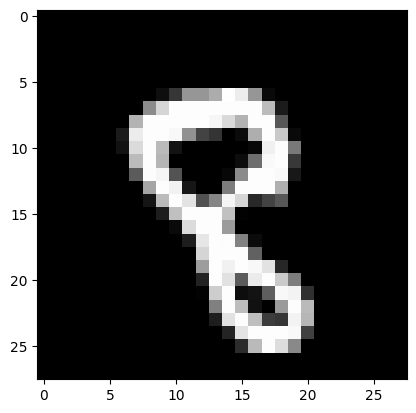

In [5]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [6]:
# print(np.unique(train_Y), len(np.unique(train_Y)))
train_Y[0]
for i in train_Y:
    temp = np.zeros(len(np.unique(train_Y)))
    temp[i] = 1
    print(temp, 5)
    break

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5


In [7]:
print(np.unique(train_Y), len(np.unique(train_Y)))

[0 1 2 3 4 5 6 7 8 9] 10


In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [10]:
train_X = train_X/255
test_X = test_X/255

In [11]:
print(train_X.shape, test_X.shape)
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# a = np.array([[1,2,3]])
# print(a.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


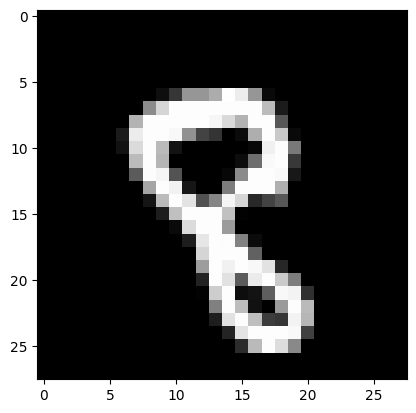

In [13]:
plt.imshow(train_X[6284], cmap = 'gray')
print(train_Y[6284])

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
img_shape = (28, 28, 1)

In [16]:
model = Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(40, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(160, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(2000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 40)        7240      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 80)        28880     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 80)        0

In [18]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [19]:
hist = model.fit(train_X, train_Y, batch_size = 100, epochs = 10, validation_split = 0.2)

Epoch 1/10
 10/480 [..............................] - ETA: 32:05 - loss: 4.7142 - accuracy: 0.1900 - precision: 0.1396 - recall: 0.0310


KeyboardInterrupt

